<a href="https://colab.research.google.com/github/SaikatGhosh94/MachineLearningCourse/blob/main/Hands_on_practice/logisticRegression/01_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv("hearing_test.csv")

In [42]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


<Axes: xlabel='test_result', ylabel='count'>

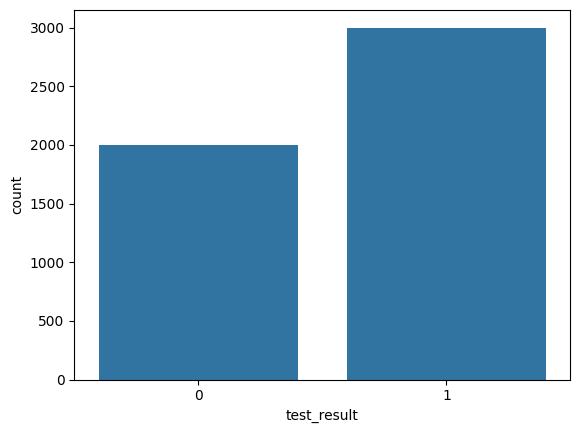

In [44]:
sns.countplot(data=df, x='test_result')

<Axes: xlabel='test_result', ylabel='age'>

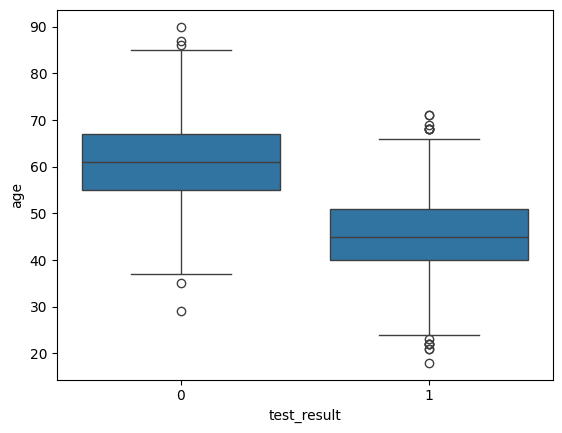

In [45]:
sns.boxplot(data=df,x='test_result',y='age')

<Axes: xlabel='test_result', ylabel='physical_score'>

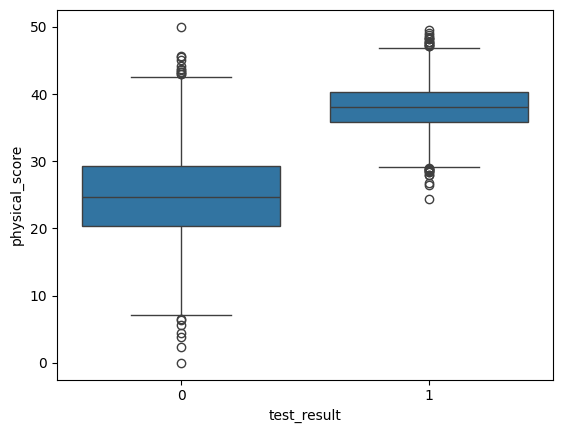

In [46]:
sns.boxplot(data=df, x='test_result',y='physical_score')

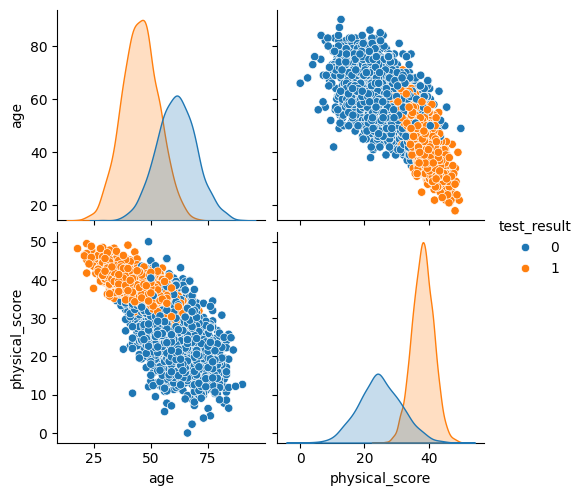

In [47]:
sns.pairplot(data=df, hue='test_result')

<Axes: >

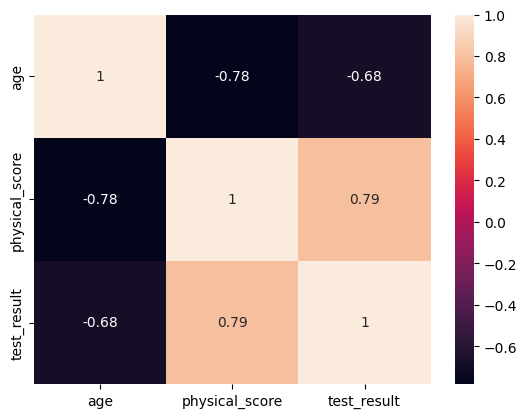

In [48]:
sns.heatmap(df.corr(),annot=True)

In [49]:
X = df.drop(columns='test_result').values
y= df['test_result'].values

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [53]:
log_model.coef_

array([[-0.96829879,  3.51615891]])

In [54]:
y_pred = log_model.predict(X_test)
y_pred

array([1, 0, 1, ..., 1, 1, 1])

In [55]:
log_model.predict_proba(X_test)

array([[0.03790776, 0.96209224],
       [0.97870046, 0.02129954],
       [0.03121289, 0.96878711],
       ...,
       [0.27549208, 0.72450792],
       [0.00455703, 0.99544297],
       [0.04905801, 0.95094199]])

In [56]:
log_model.predict_log_proba(X_test)

array([[-3.27259935e+00, -3.86449529e-02],
       [-2.15296487e-02, -3.84906980e+00],
       [-3.46692418e+00, -3.17103903e-02],
       ...,
       [-1.28919641e+00, -3.22262582e-01],
       [-5.39108352e+00, -4.56744796e-03],
       [-3.01475179e+00, -5.03022178e-02]])

In [57]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

accuracy_score(y_pred,y_test)

0.9084848484848485

In [58]:
confusion_matrix(y_test,y_pred)

array([[573,  90],
       [ 61, 926]])

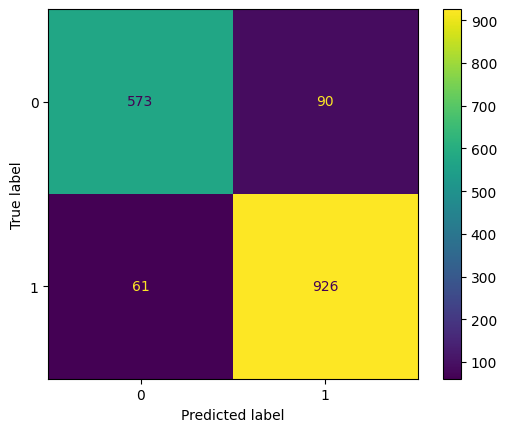

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(log_model,X_test,y_test)


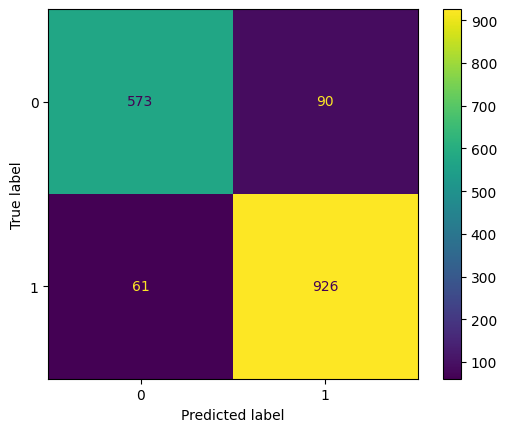

In [60]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_pred)

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       663
           1       0.91      0.94      0.92       987

    accuracy                           0.91      1650
   macro avg       0.91      0.90      0.90      1650
weighted avg       0.91      0.91      0.91      1650



In [62]:
from sklearn.metrics import precision_score,recall_score

precision_score(y_test,y_pred)

0.9114173228346457

In [63]:
recall_score(y_test,y_pred)

0.9381965552178319

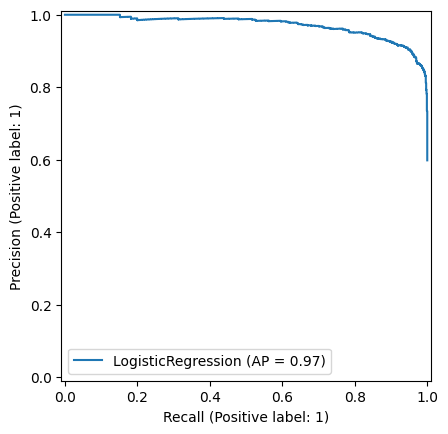

In [64]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(log_model,X_test,y_test)

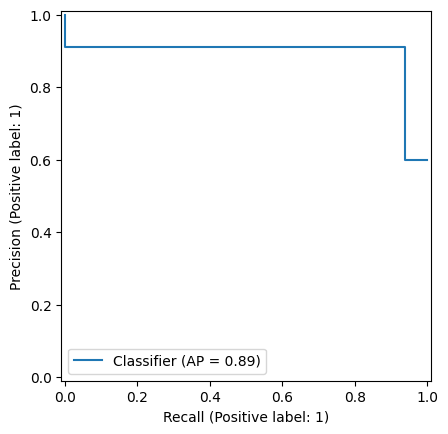

In [65]:
PrecisionRecallDisplay.from_predictions(y_true=y_test,y_pred=y_pred)

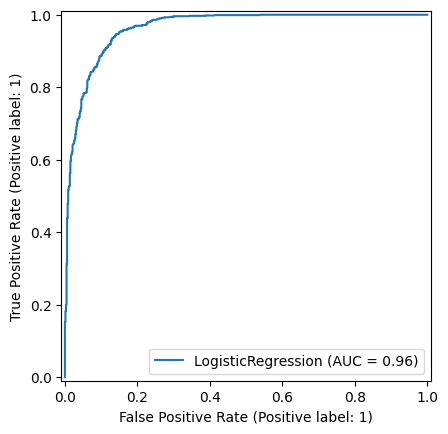

In [66]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(log_model, X_test, y_test)

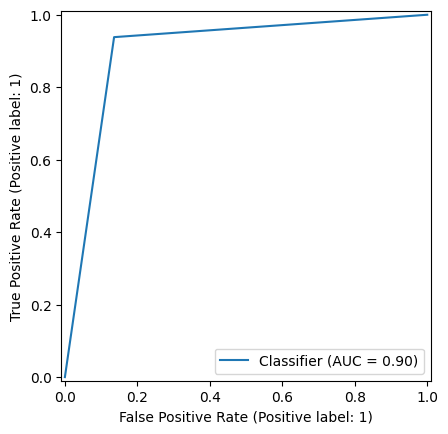

In [67]:
RocCurveDisplay.from_predictions(y_test,y_pred)